### DBSCAN 알고리즘 적용 - iris, make_circles
#### - DBSCAN에서는 특정 군집 개수로 군집을 강제하지 않는 것이 좋다. 
#### - 적절한 입실론과 min_samples 파라미터를 통해 최적의 군집을 찾는 것이 중요하다.
#### - eps 증가 -> 노이즈 데이터 개수 감소 
#### - min_sampes 증가 -> 노이즈 데이터 개수 증가 

In [45]:
#iris 데이터 
from sklearn.cluster import DBSCAN, KMeans
from sklearn.mixture import GaussianMixture
import numpy as np 
import pandas as pd 
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris, make_circles
import matplotlib.pyplot as plt 
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#dbscan 알고리즘
dbscan = DBSCAN(eps= 0.8, min_samples=8, metric='euclidean')
dbscan_cluster = dbscan.fit(load_iris().data).labels_
dbscan_cluster  

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

#### - DBSCAN은 군집의 개수를 알고리즘에 따라 자동으로 지정하므로 군집이 2개가 되었다고 효율이 떨어진다는 의미는 아니다.

In [33]:
irisDF = pd.DataFrame(data = load_iris().data, columns=['sepal_length', 'sepal_width', ' petal_length', 'petal_width'])
irisDF['target']= load_iris().target
irisDF['dbscan_cluster']=dbscan_cluster

In [64]:
### 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수  
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True): #(알고리즘 객체, DF(2차원 축소 후), 클러스터링 변수, 중심좌표 여부)
    plt.figure(figsize=(10,5))
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1: #-1이면 노이즈 
            cluster_legend = 'Noise'
            isNoise=True
        else : 
            cluster_legend = 'Cluster '+str(label)
        
        #pca 후 
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label] 
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)

In [35]:
pca = PCA(n_components=2) #2차원 축소

pca_transformed = pca.fit_transform(irisDF.drop('target', axis=1))
irisDF['ftr1'] = pca_transformed[:, 0]
irisDF['ftr2'] = pca_transformed[:, 1]  

irisDF

,sepal_length,sepal_width,petal_length,petal_width,target,dbscan_cluster,ftr1,ftr2
0,5.1,3.5,1.4,0.2,0,0,-2.754408,0.332403
1,4.9,3.0,1.4,0.2,0,0,-2.781726,-0.094352
2,4.7,3.2,1.3,0.2,0,0,-2.953877,-0.084141
3,4.6,3.1,1.5,0.2,0,0,-2.811821,-0.216964
4,5.0,3.6,1.4,0.2,0,0,-2.798314,0.334555
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,1,1.978829,0.151943
146,6.3,2.5,5.0,1.9,2,1,1.571084,-0.365349
147,6.5,3.0,5.2,2.0,2,1,1.802385,0.045466
148,6.2,3.4,5.4,2.3,2,1,1.936619,0.089308


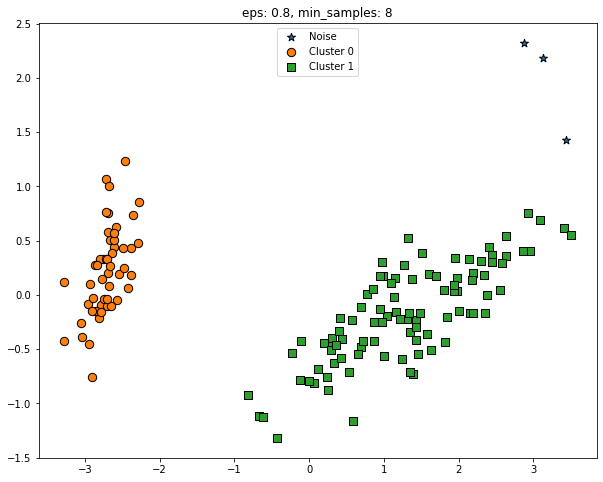

In [37]:
#DBSCAN(0.8,8) 클러스터링 시각화 
visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)
plt.title('eps: 0.8, min_samples: 8')
plt.show()

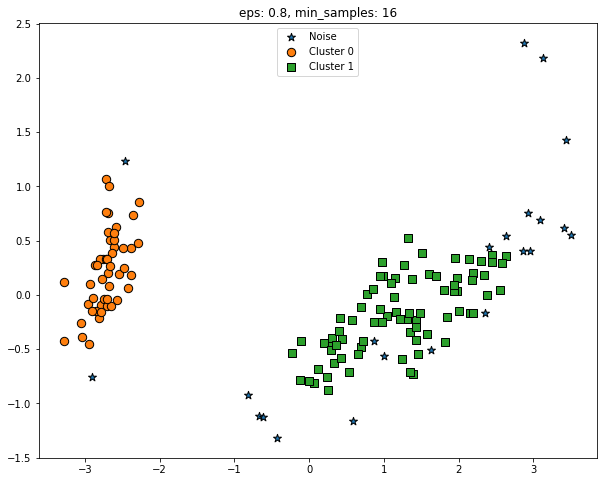

In [38]:
#DBSCAN(0.8,16) 클러스터링 시각화 
dbscan2= DBSCAN(eps=0.6, min_samples=16, metric='euclidean')
dbscan2_cluster=dbscan2.fit_predict(load_iris().data)
irisDF['dbscan2_cluster']=dbscan2_cluster

visualize_cluster_plot(dbscan2, irisDF, 'dbscan2_cluster', iscenter=False)
plt.title('eps: 0.8, min_samples: 16')
plt.show()  


#### - min_samples 값을 증가시키니 노이즈 개수가 증가되었다. 

In [55]:
##make_circles 데이터 활용 - 2개의 피처만을 생성하므로 별도의 피처 개수를 지정할 필요가 없다. 
X, y = make_circles(n_samples=1000, shuffle = True, noise =0.05, random_state = 0, factor=0.5)
clusterDF = pd.DataFrame(data= X, columns= ['ftr1', 'ftr2'])
clusterDF['target']=y

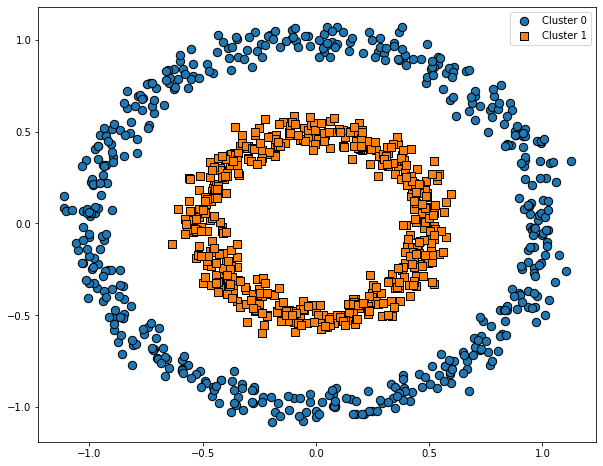

In [56]:
#클러스터링 하기 전 시각화 
visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

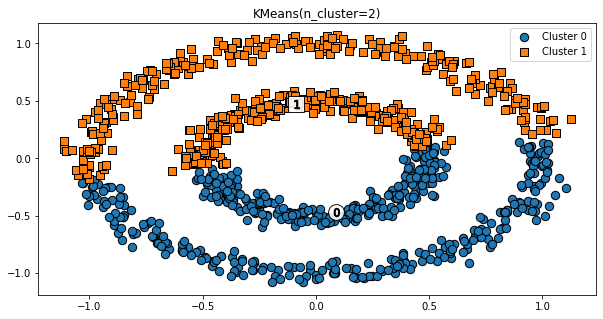

In [65]:
#KMeans, GMM, DBSCAN 비교 
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=1000, random_state=0)
gmm=GaussianMixture(n_components=2, random_state=0)
dbscan_final =DBSCAN(eps=0.2, min_samples=10, metric='euclidean')

clusterDF['kmeans']=kmeans.fit_predict(X)
clusterDF['gmm']=gmm.fit_predict(X)
clusterDF['dbscan_final']=dbscan_final.fit_predict(X)

visualize_cluster_plot(kmeans, clusterDF, 'kmeans')
plt.title('KMeans(n_cluster=2)')
plt.show()

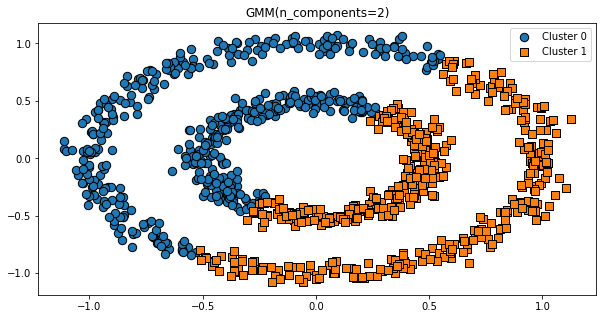

In [66]:
visualize_cluster_plot(gmm, clusterDF, 'gmm', iscenter=False)
plt.title('GMM(n_components=2)')
plt.show()

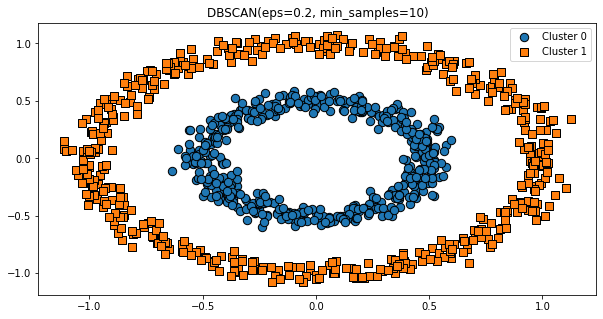

In [67]:
visualize_cluster_plot(dbscan_final, clusterDF, 'dbscan_final', iscenter=False)
plt.title('DBSCAN(eps=0.2, min_samples=10)') 
plt.show()